In [139]:
import pandas as pd

In [140]:
df_noway_kr = pd.read_parquet(r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayKR.parquet")

In [141]:
pd.set_option('display.max_columns', None)
df_noway_kr

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win
0,KR_6802199102,1700238803739,1699,13.22.541.9804,2,9,9,Alistar,False,False,False,False,False,False,6856,5569,1215,False,UTILITY,1699,7749,6,33,False
1,KR_6802124922,1700236715724,1581,13.22.541.9804,5,4,4,Syndra,False,False,False,False,False,True,12634,13559,370,False,MIDDLE,1581,15440,1,11,True
2,KR_6802047324,1700234490855,1737,13.22.541.9804,4,2,3,Orianna,False,False,False,False,False,False,10560,24783,1471,False,MIDDLE,1737,26309,6,13,False
3,KR_6800708990,1700174944722,1718,13.22.541.9804,4,5,6,Gangplank,False,False,False,False,False,False,16033,1953,13665,False,MIDDLE,1718,21922,0,10,False
4,KR_6800715104,1700172990922,1487,13.22.541.9804,2,6,11,Syndra,False,False,False,False,False,True,10061,17043,719,False,MIDDLE,1487,19007,10,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,KR_6763642564,1697994975208,1904,13.20.536.9576,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,1904,33950,2,12,False
291,KR_6763615111,1697992705004,1836,13.20.536.9576,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,1836,21072,2,12,False
292,KR_6763569909,1697990654395,1535,13.20.536.9576,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,1535,26943,0,8,True
293,KR_6763509775,1697987944620,2106,13.20.536.9576,9,8,4,Syndra,False,False,False,True,False,False,14965,34963,1881,False,MIDDLE,2106,38255,1,15,False


#### Clean data

* convert unix timestamp in milliseconds to datetime

In [142]:
import datetime

def convert_unix_to_datetime(timestamp_ms):
    # Convert milliseconds to seconds
    timestamp_sec = timestamp_ms / 1000.0
    
    # Create a datetime object
    datetime_obj = datetime.datetime.utcfromtimestamp(timestamp_sec).replace(microsecond=0)
    
    return datetime_obj

In [143]:
# Convert TimestampColumn to datetime and round down to the nearest second
df_noway_kr["gameCreation"] = pd.to_datetime(df_noway_kr["gameCreation"], unit='ms').dt.floor('s')
df_noway_kr

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win
0,KR_6802199102,2023-11-17 16:33:23,1699,13.22.541.9804,2,9,9,Alistar,False,False,False,False,False,False,6856,5569,1215,False,UTILITY,1699,7749,6,33,False
1,KR_6802124922,2023-11-17 15:58:35,1581,13.22.541.9804,5,4,4,Syndra,False,False,False,False,False,True,12634,13559,370,False,MIDDLE,1581,15440,1,11,True
2,KR_6802047324,2023-11-17 15:21:30,1737,13.22.541.9804,4,2,3,Orianna,False,False,False,False,False,False,10560,24783,1471,False,MIDDLE,1737,26309,6,13,False
3,KR_6800708990,2023-11-16 22:49:04,1718,13.22.541.9804,4,5,6,Gangplank,False,False,False,False,False,False,16033,1953,13665,False,MIDDLE,1718,21922,0,10,False
4,KR_6800715104,2023-11-16 22:16:30,1487,13.22.541.9804,2,6,11,Syndra,False,False,False,False,False,True,10061,17043,719,False,MIDDLE,1487,19007,10,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,KR_6763642564,2023-10-22 17:16:15,1904,13.20.536.9576,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,1904,33950,2,12,False
291,KR_6763615111,2023-10-22 16:38:25,1836,13.20.536.9576,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,1836,21072,2,12,False
292,KR_6763569909,2023-10-22 16:04:14,1535,13.20.536.9576,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,1535,26943,0,8,True
293,KR_6763509775,2023-10-22 15:19:04,2106,13.20.536.9576,9,8,4,Syndra,False,False,False,True,False,False,14965,34963,1881,False,MIDDLE,2106,38255,1,15,False


* convert gameVersion (13.22.541.9804) to patch (13.22)

In [144]:
# Anwendung eines Lambda-Ausdrucks auf die "gameVersion"-Spalte
df_noway_kr['gameVersion'] = df_noway_kr['gameVersion'].apply(lambda x: ".".join(x.split('.')[:2]))

# Ausgabe des aktualisierten DataFrames
df_noway_kr


,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win
0,KR_6802199102,2023-11-17 16:33:23,1699,13.22,2,9,9,Alistar,False,False,False,False,False,False,6856,5569,1215,False,UTILITY,1699,7749,6,33,False
1,KR_6802124922,2023-11-17 15:58:35,1581,13.22,5,4,4,Syndra,False,False,False,False,False,True,12634,13559,370,False,MIDDLE,1581,15440,1,11,True
2,KR_6802047324,2023-11-17 15:21:30,1737,13.22,4,2,3,Orianna,False,False,False,False,False,False,10560,24783,1471,False,MIDDLE,1737,26309,6,13,False
3,KR_6800708990,2023-11-16 22:49:04,1718,13.22,4,5,6,Gangplank,False,False,False,False,False,False,16033,1953,13665,False,MIDDLE,1718,21922,0,10,False
4,KR_6800715104,2023-11-16 22:16:30,1487,13.22,2,6,11,Syndra,False,False,False,False,False,True,10061,17043,719,False,MIDDLE,1487,19007,10,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,KR_6763642564,2023-10-22 17:16:15,1904,13.20,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,1904,33950,2,12,False
291,KR_6763615111,2023-10-22 16:38:25,1836,13.20,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,1836,21072,2,12,False
292,KR_6763569909,2023-10-22 16:04:14,1535,13.20,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,1535,26943,0,8,True
293,KR_6763509775,2023-10-22 15:19:04,2106,13.20,9,8,4,Syndra,False,False,False,True,False,False,14965,34963,1881,False,MIDDLE,2106,38255,1,15,False


* change teamPosition: UTILITY to SUPPORT

In [145]:
df_noway_kr.loc[df_noway_kr['teamPosition'] == 'UTILITY', 'teamPosition'] = 'SUPPORT'

df_noway_kr.tail()

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win
290,KR_6763642564,2023-10-22 17:16:15,1904,13.20,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,1904,33950,2,12,False
291,KR_6763615111,2023-10-22 16:38:25,1836,13.20,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,1836,21072,2,12,False
292,KR_6763569909,2023-10-22 16:04:14,1535,13.20,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,1535,26943,0,8,True
293,KR_6763509775,2023-10-22 15:19:04,2106,13.20,9,8,4,Syndra,False,False,False,True,False,False,14965,34963,1881,False,MIDDLE,2106,38255,1,15,False
294,KR_6763464678,2023-10-22 14:49:16,1403,13.20,1,9,10,Gragas,False,False,False,False,False,True,8539,12194,1076,False,JUNGLE,1403,13959,2,4,False


### Visualizations

#### Games Played on Days

In [146]:
day_games_count = df_noway_kr["gameCreation"].dt.date.value_counts()

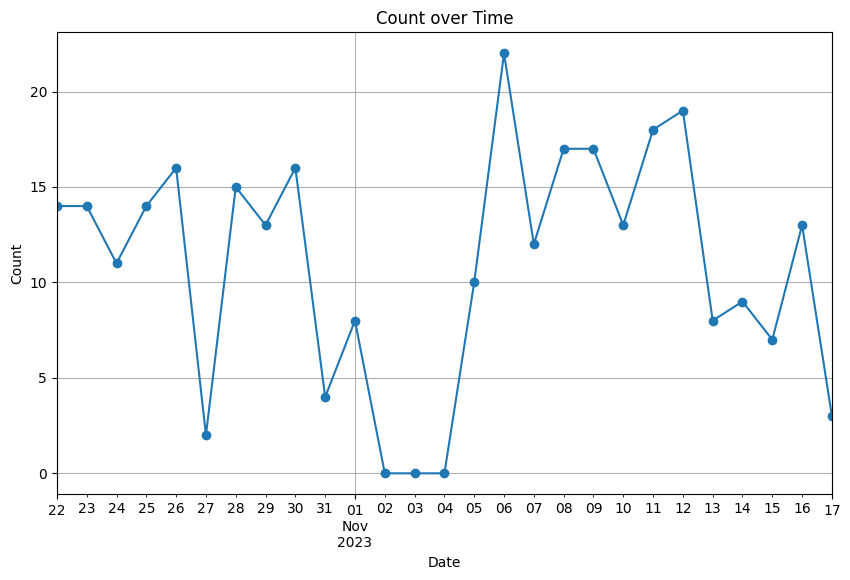

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime objects
day_games_count.index = pd.to_datetime(day_games_count.index)

# Sort the DataFrame by date
date_counts = day_games_count.sort_index()

# Resample to create a regular time series with a consistent time step
resampled_counts = date_counts.resample('D').sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
resampled_counts.plot(marker='o', linestyle='-')
plt.title('Count over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


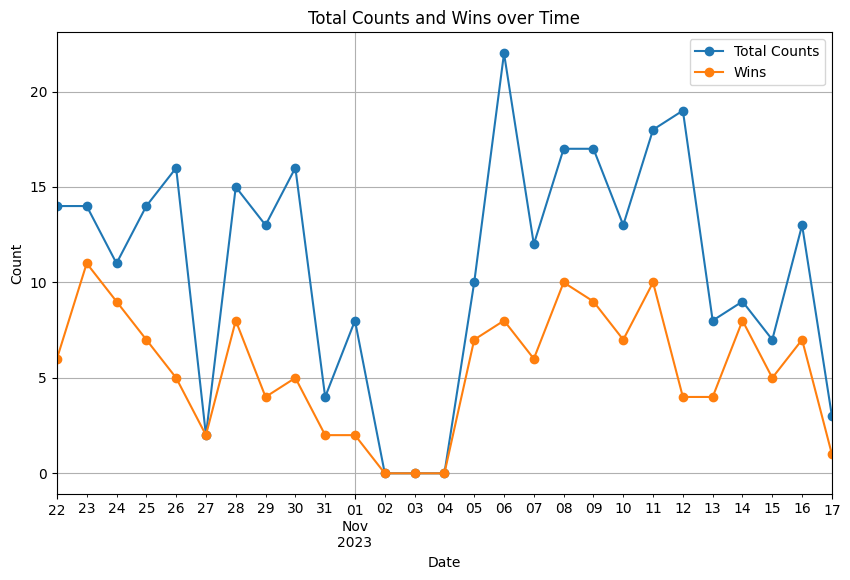

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Count total occurrences per day
total_counts = df_noway_kr.groupby(df_noway_kr['gameCreation'].dt.date).size()

# Count wins per day
win_counts = df_noway_kr[df_noway_kr['win']].groupby(df_noway_kr['gameCreation'].dt.date).size()

# Convert the index to datetime objects
total_counts.index = pd.to_datetime(total_counts.index)
win_counts.index = pd.to_datetime(win_counts.index)

# Sort the DataFrames by date
total_counts = total_counts.sort_index()
win_counts = win_counts.sort_index()

# Resample to create a regular time series with a consistent time step
resampled_total_counts = total_counts.resample('D').sum()
resampled_win_counts = win_counts.resample('D').sum()

# Plot the line graph for total counts
plt.figure(figsize=(10, 6))
resampled_total_counts.plot(marker='o', linestyle='-', label='Total Counts')

# Plot the line graph for win counts
resampled_win_counts.plot(marker='o', linestyle='-', label='Wins')

plt.title('Total Counts and Wins over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()


In [149]:
df_noway_kr['kda'] = (df_noway_kr['kills'] + df_noway_kr['assists']) / df_noway_kr['deaths'].replace(0, 1)  # Avoid division by zero
average_kda_per_champion = df_noway_kr.groupby('championName')['kda'].mean()
average_kda_per_champion.sort_values(ascending=False)

championName
Yone            6.000000
Lissandra       4.700000
Xerath          3.625000
Alistar         3.621212
Veigar          3.500000
Ahri            3.444122
Corki           3.388889
Azir            3.291667
Ziggs           3.143101
Lux             3.100000
Cassiopeia      2.800000
Orianna         2.779425
Gragas          2.723154
Jayce           2.663552
Heimerdinger    2.645833
Gangplank       2.483489
Rumble          2.389534
Syndra          2.376935
Zed             2.102273
Anivia          2.058333
Tristana        2.043056
Varus           2.000000
Vex             1.920635
Jhin            1.750000
Nautilus        1.506250
Velkoz          1.500000
Viktor          1.098333
LeeSin          1.000000
Irelia          0.857143
Khazix          0.750000
Name: kda, dtype: float64

In [150]:
(df_noway_kr.groupby("championName")["gameDuration"].mean() // 60).sort_values(ascending=False)

championName
Azir            32.0
Vex             31.0
Jhin            31.0
Cassiopeia      30.0
Xerath          29.0
Veigar          29.0
Irelia          29.0
Ahri            27.0
Lissandra       27.0
Gragas          27.0
Varus           27.0
Rumble          26.0
Nautilus        26.0
Ziggs           26.0
Jayce           26.0
Heimerdinger    26.0
Gangplank       26.0
Alistar         25.0
Orianna         25.0
Syndra          25.0
Tristana        25.0
Zed             24.0
Lux             24.0
Velkoz          23.0
Viktor          23.0
Yone            23.0
Anivia          22.0
LeeSin          21.0
Corki           16.0
Khazix          15.0
Name: gameDuration, dtype: float64

In [151]:
# Calculate the KDA for each row
df_noway_kr['kda'] = (df_noway_kr['kills'] + df_noway_kr['assists']) / df_noway_kr['deaths'].replace(0, 1)  # Avoid division by zero

# Group by 'championName' and calculate aggregated values
agg_df = df_noway_kr.groupby('championName').agg(
    GamesPlayed=('championName', 'count'),
    Wins=('win', 'sum'),
    AverageGameTime=('gameDuration', 'mean')
)

# Calculate WinRate
agg_df['WinRate'] = agg_df['Wins'] / agg_df['GamesPlayed']

# Reset the index to make 'championName' a regular column
agg_df.reset_index(inplace=True)

agg_df["AverageGameTime"] = agg_df["AverageGameTime"] // 60

agg_df.sort_values(by="GamesPlayed", ascending=False)


,championName,GamesPlayed,Wins,AverageGameTime,WinRate
19,Syndra,50,28,25.0,0.560000
17,Orianna,46,22,25.0,0.478261
29,Ziggs,32,17,26.0,0.531250
7,Gragas,30,15,27.0,0.500000
6,Gangplank,23,11,26.0,0.478261
0,Ahri,18,10,27.0,0.555556
1,Alistar,14,6,25.0,0.428571
28,Zed,11,5,24.0,0.454545
18,Rumble,9,7,26.0,0.777778
10,Jayce,9,4,26.0,0.444444


In [152]:
amount_of_games_ended_in_surrender = df_noway_kr["gameEndedInSurrender"].value_counts()[True]
amount_of_games = df_noway_kr.shape[0]
percentage_surrendered_games = amount_of_games_ended_in_surrender / float(amount_of_games)

f"Percentage of Games ended in Surrender: {round(percentage_surrendered_games, 2) * 100} %."

'Percentage of Games ended in Surrender: 39.0 %.'